# Bay Wheels Bike Share 2019 Data

### by Prem Rajamohan

## Preliminary Wrangling

Bay Wheels is a public bike sharing system in the San Francisco Bay Area, CA. Having lived in SFO for a few years, I have seen hundreds of people biking every day to/from work. This was one of the motivations for me to choose this dataset out of the avaialable options. The data used for the exploratory and explanatory analysis here consists of bike rides for the whole year of 2019. There is data for 2018 and 2019 but I am subsetting the data to just 2019 since the whole dataset turns out to be 4 MM and 2019 is 60% of that. There are fields like bike ID, station information, duration information etc. This can also be downloaded from here - https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

Load the CSV files downloaded from the above URL into pandas

In [27]:
#Files obtained from - https://www.lyft.com/bikes/bay-wheels/system-data
#Loop through all 24 CSV files and load them into a dataframe
os.chdir("/Users/apoorvadshenoy/Data/DAND - Data Visualization/")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.to_csv( "full_2_year_data.csv", index=False, encoding='utf-8-sig')

/Users/apoorvadshenoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/apoorvadshenoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/apoorvadshenoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [54]:
#Validate the data frame

df.shape # 4 MM records and 15 columns. I might keep just 2019 instead of both 2018 and 2019
df.columns # 15 and 13/15 match with website link: https://www.lyft.com/bikes/bay-wheels/system-data
df.head() #index starts at 0 after reset_index
df.tail() #index ends at 4370703 after reset index
df['user_type'].value_counts() #subscriber and customer
df.info()
df['duration_sec'].min() #60 seconds
df['duration_sec'].max() #912110 seconds = 4 days!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 500.2+ MB


Market St at 10th St                                         79976
San Francisco Ferry Building (Harry Bridges Plaza)           77477
Berry St at 4th St                                           76678
San Francisco Caltrain (Townsend St at 4th St)               75394
San Francisco Caltrain Station 2  (Townsend St at 4th St)    74193
                                                             ...  
Prototype Lab                                                    4
San Jose Depot                                                   3
Mercado Way at Sierra Rd                                         3
Philly Demo                                                      2
SF Test Station                                                  1
Name: start_station_name, Length: 474, dtype: int64

As mentioned above, I am subsetting the data to just include 2019 and this will be the dataset we use for the remainder of the project.

In [68]:
#Keeping just 2019 data as it makes up ~60% of total data
df_2019 = df[df['start_time'].str[:4] == "2019"].copy()
df_2019.shape #2.5 MM out of 4 MM

(2506983, 15)

The dataset in its raw format has a lot of cleanliness/tidiness issues. However, this project is focusing on the visualization concepts and hence, I am cleaning only the main issues below.

In [142]:
### Data Wrangling Steps - There are multiple issues with the dataset but cleaning only the most important ones for me ### 

#Cleaning#

df_2019.info() 
pd.set_option('display.max_rows', None)

#1. Time variables to time format
df_2019['new_start_time'] = pd.to_datetime(df_2019['start_time'])
df_2019['new_end_time'] = pd.to_datetime(df_2019['end_time'])

df_2019.drop(['start_time','end_time'], axis=1, inplace=True)
df_2019.head()

#2. Changing duration to minutes since that is more easy to understand

df_2019['duration_min'] = round((df_2019['duration_sec']/60),2)
df_2019['duration_min'].value_counts().sort_values(ascending=False) # majority are as expected but there are crazy outliers
df_2019.drop('duration_sec',axis=1, inplace=True)

#3. Converting user_type to a categorical variable
df_2019['user_type'] = df_2019['user_type'].astype('category')
df_2019.info()

#4. Converting ID columns to STR from FLOAT
df_2019['start_station_id'] = df_2019['start_station_id'].astype('str')
df_2019['end_station_id'] = df_2019['end_station_id'].astype('str')
df_2019['bike_id'] = df_2019['bike_id'].astype('str')

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    object
bike_share_for_all_trip    object
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
rental_access_method       object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
user_type                  category
new_start_time             datetime64[ns]
new_end_time               datetime64[ns]
duration_min               float64
dtypes: category(1), datetime64[ns](2), float64(5), object(7)
memory usage: 270.2+ MB


In [146]:
#Deriving other necessary fields - https://www.tutorialspoint.com/python/time_strftime.htm#

df_2019['start_date'] = df_2019.new_start_time.dt.strftime('%Y-%m-%d')
df_2019['start_hour'] = df_2019.new_start_time.dt.strftime('%H')
df_2019['start_day'] = df_2019.new_start_time.dt.strftime('%A')
df_2019['start_month'] = df_2019.new_start_time.dt.strftime('%B')

df_2019.head(30) #looks right

bike_id bike_share_for_all_trip end_station_id  end_station_latitude  \
0     4861                      No          196.0             37.808894   
1     5506                      No          134.0             37.752428   
2     2717                      No          157.0             37.846784   
3     4557                      No           53.0             37.775946   
4     2100                      No           28.0             37.787168   
5     3532                      No          266.0             37.862464   
6     5114                      No          146.0             37.742314   
7     3967                      No          314.0             37.333988   
8     4813                      No           70.0             37.773311   
9     1976                      No          129.0             37.758862   
10    3826                      No          292.0             37.344882   
11    4642                      No          256.0             37.875112   
12     263                     Yes           60.0             37.774520   
13    3035                      No          349.0             37.781010   
14    3886                     Yes          304.0             37.348759   
15    5019                      No           52.0             37.777416   
16    3842                     Yes          317.0             37.333955   
17    5480                      No          323.0             37.798014   
18    4960                     Yes           21.0             37.789625   
19    5257                      No          133.0             37.755213   
20    3649                      No          349.0             37.781010   
21    5382                      No           58.0             37.776619   
22    5193                      No          118.0             37.759177   
23     198                     Yes          221.0             37.794396   
24    5265                     Yes           39.0             37.778999   
25    5354                     Yes           39.0             37.778999   
26    4533                      No          118.0             37.759177   
27    5309                      No          126.0             37.761634   
28    5122                      No           28.0             37.787168   
29    4542                      No          251.0             37.870555   

    end_station_longitude                                  end_station_name  \
0             -122.256460                           Grand Ave at Perkins St   
1             -122.420628                            Valencia St at 24th St   
2             -122.291376                              65th St at Hollis St   
3             -122.437777                            Grove St at Divisadero   
4             -122.388098                      The Embarcadero at Bryant St   
5             -122.264791                            Parker St at Fulton St   
6             -122.423181                           30th St at San Jose Ave   
7             -121.894902                    Santa Clara St at Almaden Blvd   
8             -122.444293                            Central Ave at Fell St   
9             -122.412544                            Harrison St at 20th St   
10            -121.896965                               Empire St at 1st St   
11            -122.260553                          Hearst Ave at Euclid Ave   
12            -122.409449                              8th St at Ringold St   
13            -122.405666                              Howard St at Mary St   
14            -121.894798                              Jackson St at 5th St   
15            -122.441838                         McAllister St at Baker St   
16            -121.877349                         San Salvador St at 9th St   
17            -122.405950                                Broadway at Kearny   
18            -122.400811  Montgomery St BART Station (Market St at 2nd St)   
19            -122.420975                            Valencia St at 22nd St   
20            -122

### What is the structure of your dataset?

The cleaned dataset has 15 columns and ~2.5 MM records. Each record in the dataset is a 'trip' and we know the station information, duration details, user types etc. I also created a few derived columns mentioned above to simplify/enhance the visualization process.

### What is/are the main feature(s) of interest in your dataset?

I am particularly interested in analyzing the number/duration of trips taken and how these relate to different characteristics like user type, time of day, rental access etc. Some sample questions - How are trip durations generally distributed? Does it vary by certain days/months/time? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Starting station, user type, time information (hour, day, month) etc. seem very relevant here since the number/duration of trips taken will vary directly based on weekday/weekend, member/non member etc.


## Univariate Exploration

The first thing I want to look at is how duration is distributed. I expect most values to be around 5-7 minutes or in that range but there is bound to be outliers because of someone who just loves biking :) or some data quality issues.

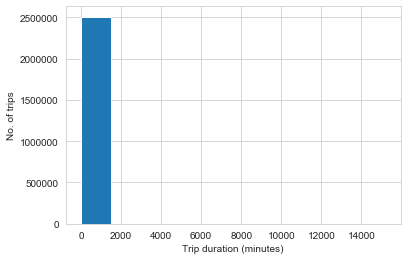

In [170]:
#Setting a few chart options right off the bat
plt.rcParams['figure.figsize'] = 6, 4
color = sb.color_palette('colorblind')[0]
sb.set_style('whitegrid')

#Plot histogram of duration
plt.hist(data=df_2019, x='duration_min');
plt.xlabel('Trip duration (minutes)');
plt.ylabel('No. of trips');

As I mentioned above, there are some outliers to the extreme right but I think majority of the values should be within a reasonable time. Checking that below and replotting.

In [157]:
df_2019['duration_min'].describe(percentiles=[.90,.99])
#50% is 9 minutes, 90% is around 20 minutes, 99% is around 68 minutes.

count    2.506983e+06
mean     1.346080e+01
std      3.291190e+01
min      1.000000e+00
50%      9.520000e+00
90%      2.218000e+01
99%      6.877000e+01
max      1.520183e+04
Name: duration_min, dtype: float64

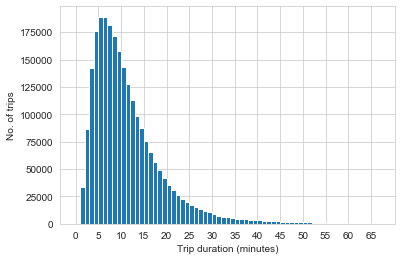

In [163]:
bins = np.arange(0, 68, 1)
plt.hist(data=df_2019, x='duration_min', bins=bins);
plt.xticks(np.arange(0, 68, 5));
plt.xlabel('Trip duration (minutes)');
plt.ylabel('No. of ,trips');

This is a much cleaner distribution and the majority of the data values are within 5 and 15 minutes. Next, I want to see how the number of trips taken differ by hour of the day, day of the week, and month.

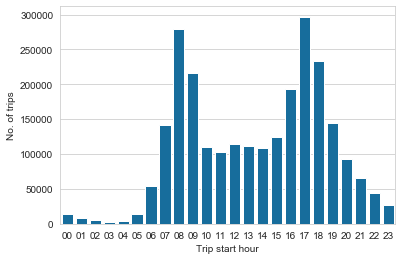

In [171]:
#Hour of the day
sb.countplot(data=df_2019,x='start_hour', color=color);
plt.xlabel('Trip start hour');
plt.ylabel('No. of trips');

There are two peaks in the graph and it is around 7-9 AM and 4-6 PM corresponding to rush hours in the morning and evening. 

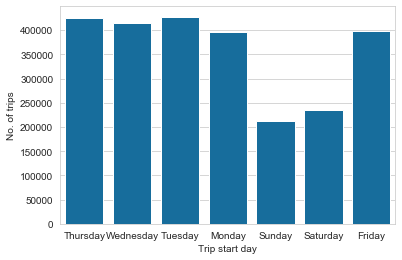

In [172]:
#Day of the week
sb.countplot(data=df_2019,x='start_day', color=color);
plt.xlabel('Trip start day');
plt.ylabel('No. of trips');

We need to convert the variable into ordered categories so that it is easier to understand the chart. Doing that below.

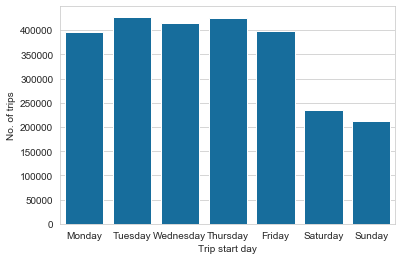

In [173]:
#Create categorical variable
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_order = pd.api.types.CategoricalDtype(ordered=True, categories=order_day)
df_2019['start_day'] = df_2019['start_day'].astype(weekday_order)

#Plot now
sb.countplot(data=df_2019,x='start_day', color=color);
plt.xlabel('Trip start day');
plt.ylabel('No. of trips');

As seen above (and as expected), there are almost double the number of trips on weekdays compared to weekends. Using the insight from the previous chart, it is pretty obvious majority of the bike rides are used for commuting to/from work.

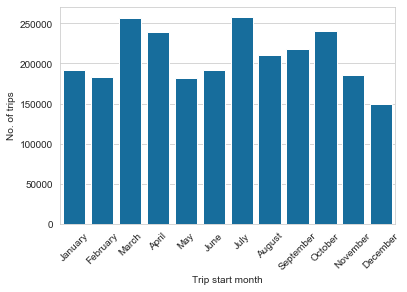

In [176]:
#Month of the year
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_order = pd.api.types.CategoricalDtype(ordered=True, categories=order)
df_2019['start_month'] = df_2019['start_month'].astype(month_order)

#Plot now
sb.countplot(data=df_2019,x='start_month', color=color);
plt.xlabel('Trip start month');
plt.ylabel('No. of trips');
plt.xticks(rotation=45);

March and April have a pretty high number of rides and this could be because of the beginning of the Spring season. Similarly, the number of rides pick up around June, July and this is because of the summer season I believe. For some reason, there is also a spike in October.

Looking at how the number of rides differ by user type now

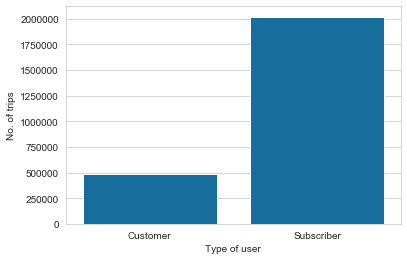

In [177]:
sb.countplot(data=df_2019,x='user_type', color=color);
plt.xlabel('Type of user');
plt.ylabel('No. of trips');

Regular members (subscribers) make up 4x the number of rides a customer takes, which is pretty relatable. 

I am also curious to see if there are certain stations with a lot of rides. Plotting them below.

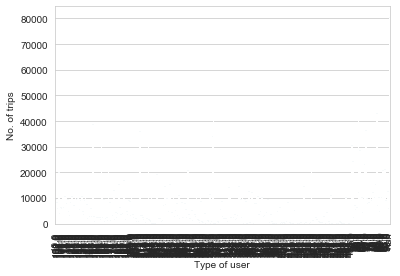

In [178]:
sb.countplot(data=df_2019,x='start_station_id', color=color);
plt.xlabel('Type of user');
plt.ylabel('No. of trips');
plt.xticks(rotation=90);

#too many distinct station IDs to make sense of this.

The only other variable that can be plotted is the rental_access_method. Doing that below.

In [180]:
#Checking how the variable is populated
df_2019.rental_access_method.isnull().sum() #so mostly NULL actually
sb.countplot(data=df_2019,x='rental_access_method', color=color);
plt.xlabel('Rental access method');
plt.ylabel('No. of trips');

Most rides are accessed through the app but there are a few rides that use the SFO Clipper card which can also be used for the BART public transport.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Trip duration had a few outliers that were in the order of days when compared to 90% of the data which was less than 20 minutes rides. I am not sure if the trips that are recorded as days are data anamolies but it is comforting to see than 99% of the rides were less than 1 hour with majority of them being short trips.

It was also interesting to see the clear difference in number of rides taken on weekdays compared to weekends. Most rides are probably used by professional people travelling to/from work. This is kind of confirmed by the fact that usage peaks during rush hours in the morning/evening. I can also personally vouch for this having lived in the Bay Area!

Looking at ride usage by month shows that early Spring and Summer are the most active months with October being an outlier. It is possible that people are making the most use of bike rides before winter kicks in. 

Majority of the bike rides are by members (subscribers) and this makes intuitive sense as they became a member to ride bikes on a daily basis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data set was pretty clean enough to use directly but given the outliers in the duration column, I had to restrict the data to show just 99% of the data. I did this by using describe() and xticks() in the plot.

## Bivariate Exploration

In this section, I want to see how the duration of trips taken vary by 

1. Start hour
2. Day of the trip
3. Month of the trip
4. User type

Each of these variables have been explored individually above and looking at how they work in conjunction will be interesting.

After that, I want to explore how the number of trips taken vary by user type and time columns (day and month of the trips).

1. Average trip duration by start hour

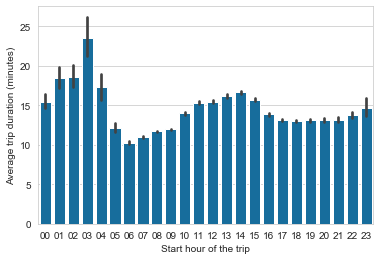

In [183]:
#barplot shows the average values by default - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(data=df_2019, x='start_hour', y='duration_min', color=color);
plt.xlabel('Start hour of the trip');
plt.ylabel('Average trip duration (minutes)');

Trips taken in the morning from 6-9 AM are the shortest since I expect it is most people going to work. Trips taken late night (12-3 AM) are longer than other trips for some reason.

2. Average trip duration by day

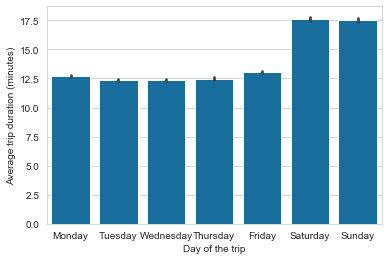

In [184]:
sb.barplot(data=df_2019, x='start_day', y='duration_min', color=color);
plt.xlabel('Day of the trip');
plt.ylabel('Average trip duration (minutes)');

This is a very intuitive graph. Weekday rides are shorter by 5 minutes on average compared to weekends. On weekdays, as
hypothesized above, most people are just commuting to/from work but on weekends, it is more leisurely.

3. Average trip duration by month

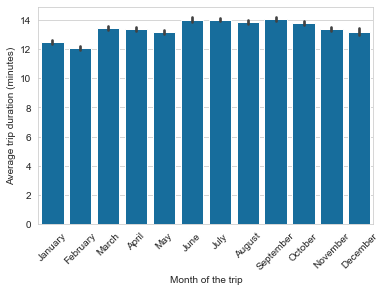

In [187]:
sb.barplot(data=df_2019, x='start_month', y='duration_min', color=color);
plt.xticks(rotation=45);
plt.xlabel('Month of the trip');
plt.ylabel('Average trip duration (minutes)');

Again, a pretty intuitive graph - the average duration goes up starting from March until Summer ends in September.

4. Average trip duration by user type

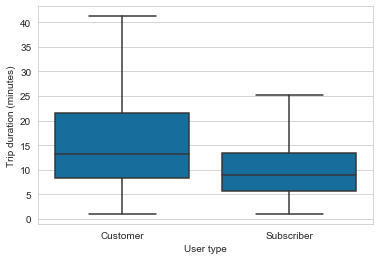

In [198]:
sb.boxplot(data=df_2019, x='user_type', y='duration_min', color=color, showfliers=False); #ignoring outliers
plt.xlabel('User type');
plt.ylabel('Trip duration (minutes)');

I wanted to plot a box plot here mainly for some variation but it is interesting to see that customers (non-members) have a bigger spread compared to subscribers who probably have a routine trip schedule in place.

Moving on to the other bivariate plots that look at number of trips by user type and time fields (day/month).

1. Usage by member type and day

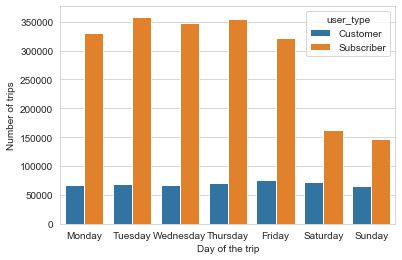

In [189]:
sb.countplot(data=df_2019, x='start_day', hue='user_type');
plt.xlabel('Day of the trip');
plt.ylabel('Number of trips');

There is not much of a new insight here - subscribers ride bikes way more than a customer (non-member). However, it is interesting to see that usage for subscribers drops on the weekends and there is a very slight increase in usage for non-members on Friday and Saturday.

2. Usage by member trip and month

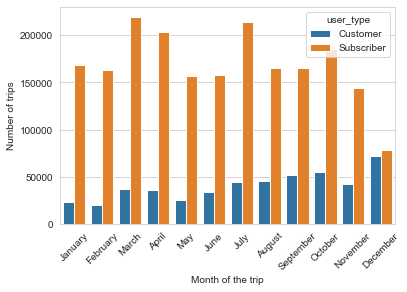

In [191]:
sb.countplot(data=df_2019, x='start_month', hue='user_type');
plt.xlabel('Month of the trip');
plt.ylabel('Number of trips');
plt.xticks(rotation=45);

Both subscribers and customers ride more in the Summer months but the customers (non-members) show an upward trend starting in May all the way until November.

I am also curious to see how rental method differs by user type

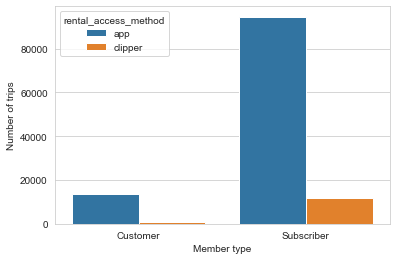

In [193]:
sb.countplot(data=df_2019, x='user_type', hue='rental_access_method');
plt.xlabel('Member type');
plt.ylabel('Number of trips');

As noted in the univariate plots, app usage is predominantly higher than clipper card usage. However, customers hardly use the clipper card to rent a bike ride but subscribers are more flexible.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

My main feature of interest - duration of bike rides vary significantly depending on other features like hour, day, month, and user type. Most rides during peak hours are shorter than other hours. Weekday rides are much shorter in general and summer months see a slighly higher average duration. The plots above also show that subscribers tend to do quicker trips than customers (non-members).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The only plot comparing other features than the main features was the plot between user type and rental access method. It was interesting to see how customers mostly only use the app to rent a bike whereas a good number of subscribers used the clipper card as well. My hypothesis is that customers (non-members) might be tourists or people who do not use public transport and hence do not want to invest in a 10$ clipper card.

## Multivariate Exploration

For the multi-variate section, I am going to keep one of the variable constant as user type. Then we will compare how bike usage duration varies with the time fields like hour/day/month by user type.

1. Average trip duration by day of the trip and user type

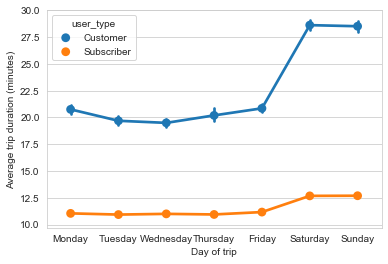

In [199]:
sb.pointplot(data=df_2019, x='start_day', y='duration_min', hue='user_type');
plt.xlabel('Day of trip');
plt.ylabel('Average trip duration (minutes)');

A very interesting trend here - customers (non-members) take 1.5x the usual ride duration on weekends compared to weekdays but subscribers (members) more or less ride the same duration irrespective of the day.

2. Average trip duration by month of the trip and user type

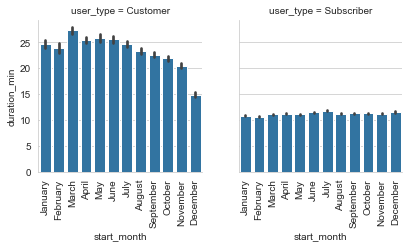

In [207]:
g = sb.FacetGrid(df_2019, col="user_type");
g.map(sb.barplot, "start_month", "duration_min");
g.set_xticklabels(rotation=90);

In the bivariate plot above, we saw that customers (non-members) have a higher average bike duration than subscribers (members) and we saw that certain months see longer trips. Combining all elements into one chart shows us that customers take longer trips in the Summer months but subscribers are more or less constant across all months.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It was very interesting to use additional cuts to see how some of the bivariate plots changed upon using the user type variable in conjunction. For example, we noticed that weekday trips are shorter than weekend trips but observing that with the user type split, shows that customers behaviour is distinctly different between weekends and weekdays but subscribers do not exhibit such a significant behavior. Similarly, looking at the interaction between month of the trip, user type, and duration together shows that customers again behave differently in different months but subscribers are not that volatile.

### Were there any interesting or surprising interactions between features?

I was interested mainly by how customers (non-members) behave differently in different months and days but subscribers do not show such a significant difference in their bike usage behavior across time probably because of their routine usage. 